# Lab 07 - Unsupervised learning

(Adapted from [one of the 2019 ICFA tutorial notebooks](https://github.com/radiasoft/icfa_ml/blob/master/tutorials_2019/unsupervized_learning/unsupervised_learning.ipynb))

## Tasks
- K-means clustering comparison
- DBSCAN algorithm



# Environment

In [ ]:
!pip install scikit-learn

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

# Introduction

As opposed to supervised learning, in unsupervised learning the goal is to infer a model which describes an unknown structure from unlabeled data. We'll consider two classes of unsupervised learning algorithms: clustering and anomaly detection.

We'll also see how unsupervised techniques can be used to reduce the dimensionality of the input feature set.

# 1. Clustering

Clustering is the task of grouping a set of items together in such a way that items in one group (a cluster) are more similar to each other than to those in other groups.


## K-Means Algorithm

Suppose we have a dataset {$\boldsymbol{x}_1$, $\boldsymbol{x}_2$, $\boldsymbol{x}_3$, ..., $\boldsymbol{x}_N$} consisting of $N$ observations of $D$ dimensional vectors $\boldsymbol{x}$ (i.e. $D$ features).

The goal is to partition the dataset into $K$ clusters. Therefore, the number of clusters in our dataset needs to be known a priori.

A cluster is a group of data points whose distances between one another in $D$-dimensional space are small compared to points outside the cluster.

This can be formalized by introducing a $D$-dimensional mean vector $\boldsymbol{\mu}_k$, where $k = 1,2,3,...K$. This represents the center of the cluster.

The K-means clustering algorithm assigns a vector $\boldsymbol{x}_{i}$ to the cluster which minimizes the following distortion measure: $J_k = || \boldsymbol{x}_{i} - \boldsymbol{\mu}_k||^2$

The mean vector is then updated by computing the mean intensity value of the considered cluster such that

\begin{equation}
\boldsymbol{\mu}_k = \frac{\sum\limits_i r_{i,k}\boldsymbol{x}_{i}}{\sum\limits_i r_{i,k}}
\end{equation}

where

\begin{equation}
r_{i,k}=\begin{cases}
    1, & \text{if $k = \arg_k \min(||\boldsymbol{x}_{i} - \boldsymbol{\mu}_k||^2)$}\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

(see also Lecture 13.2 — Clustering | KMeans Algorithm — [ Machine Learning | Andrew Ng ] https://www.youtube.com/watch?v=hDmNF9JG3lo for more details)

## Create Dataset
Let's generate a two-dimensional dataset that we can easily visualize.

Note that the first 7 points are similar to each other (therefore they would belong to cluster 0) while the next 7 points are also similar to each other (they would belong to cluster 1)

In [2]:
# Generate a dataset
data = np.array([[2,2], [2,3], [3,2], [3,3], [5,4], [1,1], [6,4], [15,12], [14,14], [18,14], [25,30], [21,17], [18,16], [12,18]])

# Inspect the shape
data.shape

(14, 2)

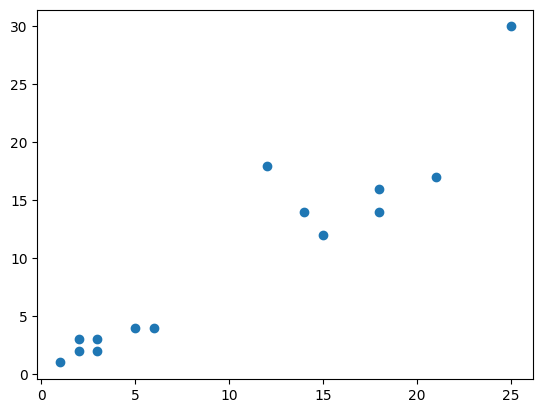

In [3]:
# Plot the data
plt.scatter(data[:,0], data[:,1])

## Clustering by distances

### **Task**
Complete the implementation of the functions `distance`, `predict_cluster` and `predict_clusters`, which are used within the k-means algorithm.
    

In [4]:
# Define a distance function as the Euclidean distance
def distance(pt1, pt2):

    ## SOLUTION
    return np.sqrt(np.sum((pt1 - pt2)**2))

# Test
distance(data[0], data[1])

1.0

In [5]:
# Return a cluster index of a single data point, given a list of cluster centers
def predict_cluster(pt1, centers):

    ## SOLUTION
    dist = [distance(pt1, mu) for mu in centers]

    ix = np.argmin(dist)

    return ix

# Test. This should return 0
predict_cluster(data[0], [ np.array([1,2]), np.array([20,20]) ] )

0

In [6]:
# Return an array of cluster indexes (cluster_labels)
def predict_clusters(data, centers):
    ## SOLUTION
    return np.array([predict_cluster(pt, centers) for pt in data])

# Test. This should return an array of labels: array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
predict_clusters(data, [ np.array([1,2]), np.array([20, 20]) ] )

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

## Visualization

The code below assigns colors to each cluster: Cluster 0 will be blue, Cluster 1 will be red, etc.

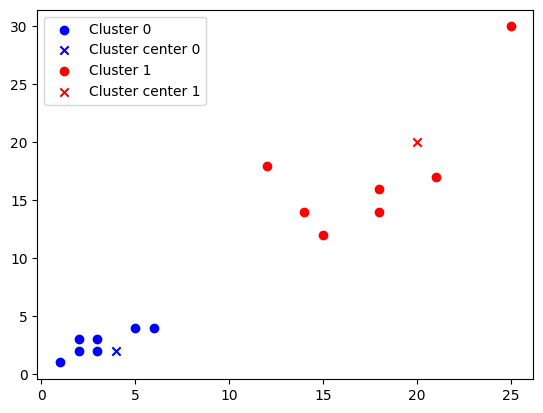

In [7]:
def plot_clusters(data, centers):

    # Get the cluster indices
    cluster_labels = predict_clusters(data, centers)

    fig, ax = plt.subplots()
    colors = ['blue', 'red', 'green', 'orange']
    for ix, center in enumerate(centers):
        cdata = data[cluster_labels == ix]
        ax.scatter(cdata[:,0], cdata[:,1], color=colors[ix], label=f'Cluster {ix}')
        ax.scatter(center[0], center[1], marker='x', color=colors[ix], label=f'Cluster center {ix}')
    ax.legend()

plot_clusters(data,  [ np.array([4,2]), np.array([20, 20]) ] )

## Algorithm

### **Task**
    
Complete the implementation of the function below, which performs one iteration of k-means, i.e.:
    
- Finding the center for each data point
- Calculating the mean of the data points associated with each cluster.
    


In [8]:
# This will perform one iteration of the algorithm
def calculate_new_centers(data, centers):
    """
    Args:
        data (array-like): points with shape (N points, D features)
        centers (list): initial cluster centers

    Returns:
        new_centers (list): new centers

    """

    ## SOLUTION

    # List of indices
    cluster_labels = predict_clusters(data, centers)

    # Create new centers based on the means of the clusters
    new_centers = []
    for ix in range(len(centers)):
        cdata = data[cluster_labels == ix]
        mean = np.mean(cdata, axis=0)
        new_centers.append(mean)

    return new_centers

calculate_new_centers(data, data[2:4])

[array([2.        , 1.66666667]), array([12.63636364, 12.27272727])]

We'll iterate the algorithm 4 times

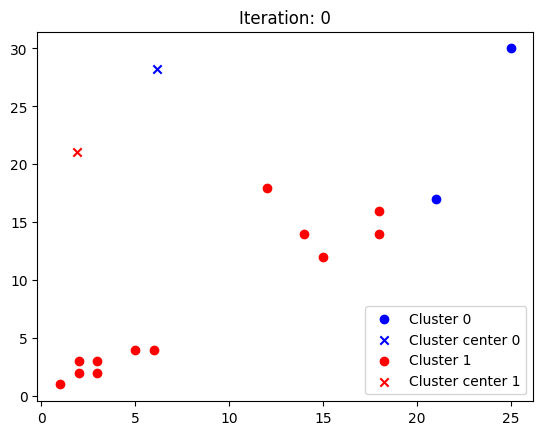

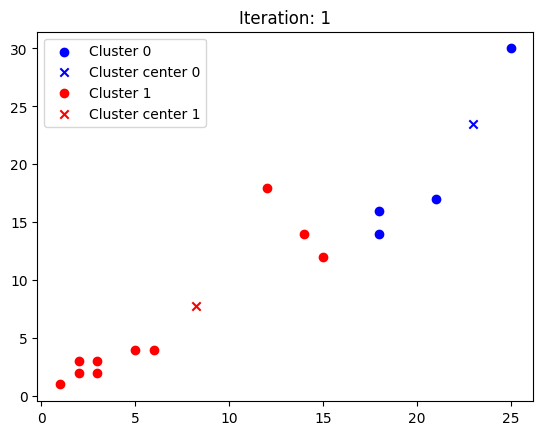

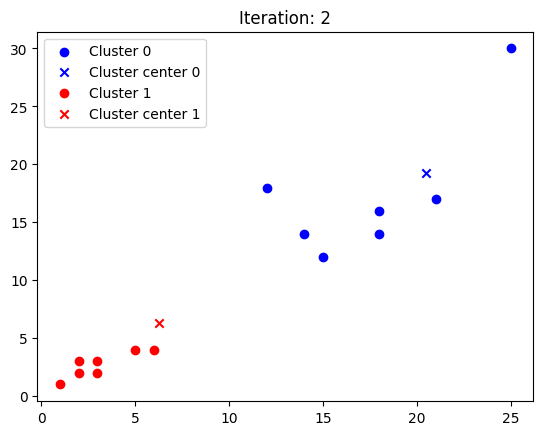

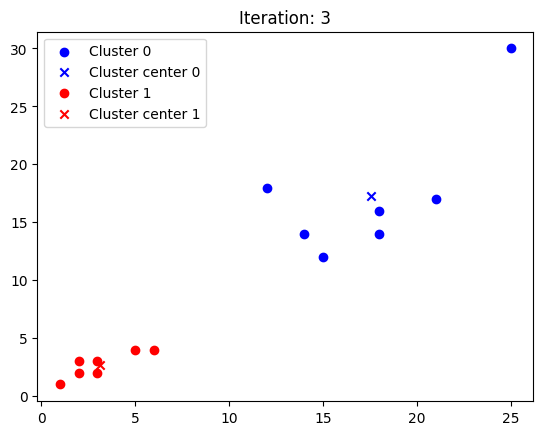

In [9]:
# Randomly initialize the means to some value (x1, x2) within our two-dimensional space
means0 = np.array([[np.random.random()*30,np.random.random()*30], [np.random.random()*30,np.random.random()*30]])

for it in range(4):
    # Plot the current solution
    plot_clusters(data, means0)
    plt.title(f'Iteration: {it}')

    # Next solution
    means0 = calculate_new_centers(data, means0)

In [10]:
# Final result
means0

[array([17.57142857, 17.28571429]), array([3.14285714, 2.71428571])]

In [11]:
# Final cluster assignments
predict_clusters(data, means0)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

## K-Means with sklearn

In practice we often use algorithms from well-developed packages.

In [12]:
# We now import the KMeans module in sklearn
from sklearn.cluster import KMeans

In [13]:
# We can use a one-liner to fit our data using 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

In [14]:
# The final means of each cluster
kmeans.cluster_centers_

array([[17.57142857, 17.28571429],
       [ 3.14285714,  2.71428571]])

In [15]:
# Label per data point indicating the final cluster it has been assigned to:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [16]:
# We can predict new values
kmeans.predict([[0, 0], [17, 15]] )

array([1, 0], dtype=int32)

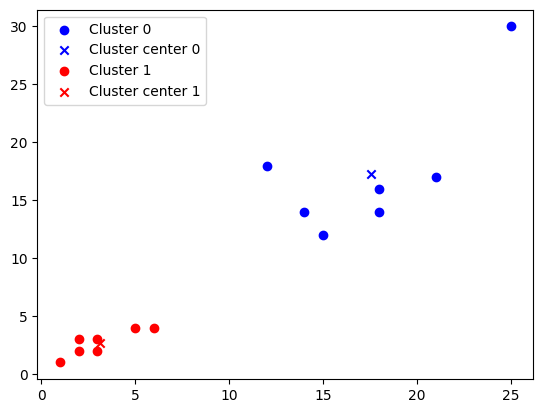

In [17]:
# Use the same plotting function as before
plot_clusters(data, kmeans.cluster_centers_)

### **Task**
    
Try K-means on a smoother dataset, generated below. Plot the clusters using
`plot_clusters()`.
    

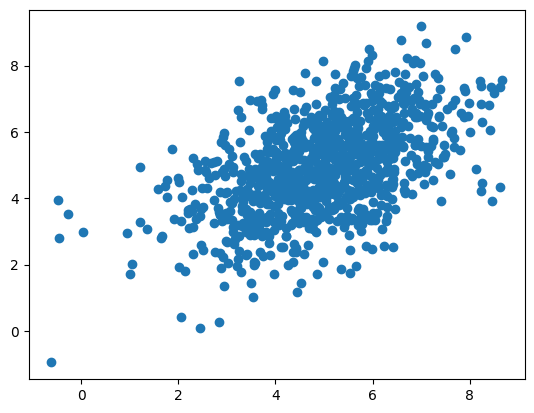

In [18]:
data2 = np.random.multivariate_normal([5, 5], np.array([[2, 1], [1,2]]), size=1000)
plt.scatter(data2[:,0], data2[:,1])

In [19]:
## SOLUTION
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(data2)

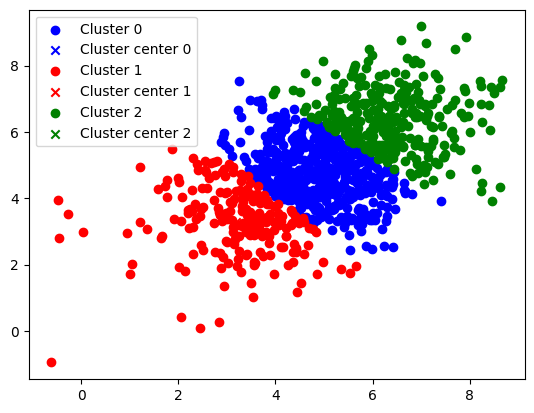

In [20]:
# Use the same plotting function as before
plot_clusters(data2, kmeans2.cluster_centers_)

# 2. Anomaly Detection

Anomaly detection is the identification of outliers, which do not resemble the bulk of the dataset. Several techniques are used in anomaly detection, including:



*   k Nearest Neighbours
*   DBSCAN
*   Isolation trees

## k Nearest Neighbours Distance

The k Nearest Neighbours distance anomaly detection algorithm assigns a score to each point in the dataset based on its distance from its kth nearest neighbour.

The larger the distance score, the more likely the point is an anomaly.

In [21]:
# Randomly generate points
data = np.random.randint(10, size=(15,2)) + 10

# Add outliers
data = np.vstack((data, np.array([5,5])))

# Inspect the shape
data.shape

(16, 2)

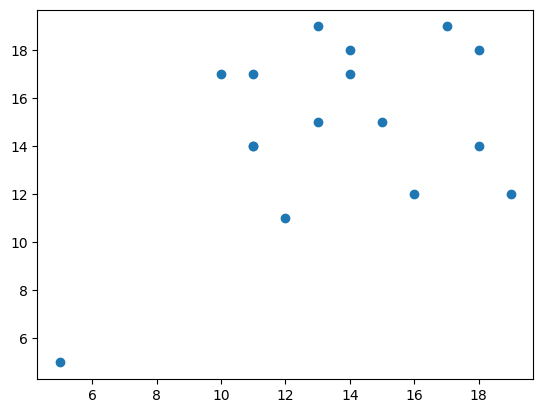

In [22]:
# Visualize the data
plt.scatter(data[:,0], data[:,1])

### **Task**
    
Complete the implementation of the function `compute_distances` below.
    

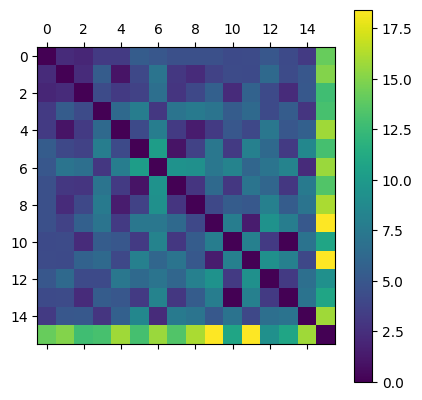

In [23]:
# Compute distances of each point wrt all other points

def compute_distances(data):
    """"
    Input: array of shape (N points, D features)
    Output: array of shape (N,N)
    """

    ## YOUR CODE
    return np.array([[distance(pt1, pt2) for pt1 in data] for pt2 in data])

distances = compute_distances(data)

#visalize the distances
plt.matshow(distances)
plt.colorbar()

In [24]:
# For each point, sort the distances and check which is the (k + 1)th nearest neighbour

def generate_knn_distances(k, distances):

    knn_distances = []

    for i in range(len(data)):

        sorted_distances = np.sort(distances[i,:])

        knn_distances.append(sorted_distances[k+1])

    return np.array(knn_distances)

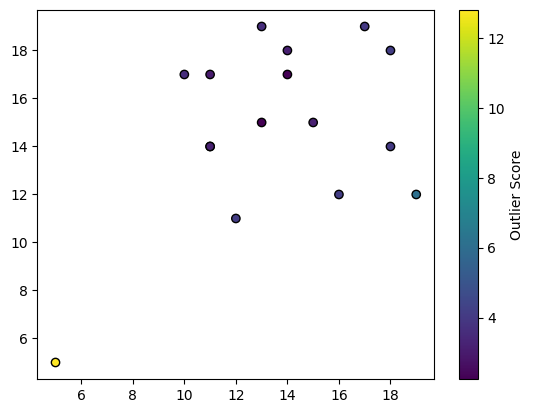

In [25]:
# Plot scatter plot with heat map

knn_distances = generate_knn_distances(3, distances)

plt.scatter(data[:,0], data[:,1], c=knn_distances, edgecolors='black')
plt.colorbar(label='Outlier Score')

### Try on some other data

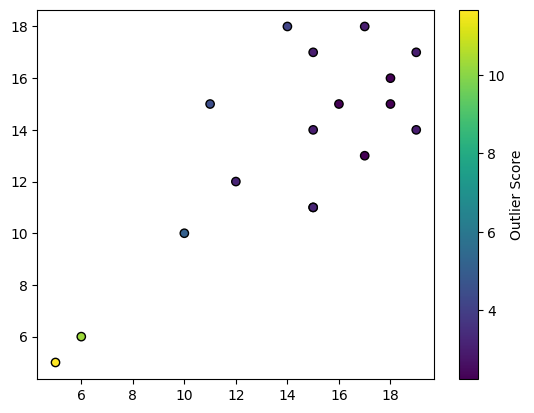

In [26]:
# Randomly generate points

data = np.random.randint(10, size=(15,2)) + 10

# Add outliers

data = np.vstack((data, np.array([[5,5], [6,6]])))

distances = compute_distances(data)

knn_distances = generate_knn_distances(3, distances)

plt.scatter(data[:,0], data[:,1], c=knn_distances, edgecolors='black')
plt.colorbar(label='Outlier Score')

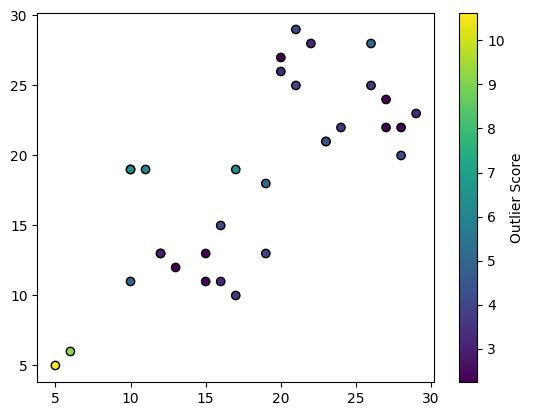

In [27]:
# Randomly generate points

data_1 = np.random.randint(10, size=(15,2)) + 10

data_2 = np.random.randint(10, size=(15,2)) + 20

# Add outliers

data = np.vstack((data_1, data_2))

data = np.vstack((data, np.array([[5,5], [6,6]])))

distances = compute_distances(data)

knn_distances = generate_knn_distances(3, distances)

plt.scatter(data[:,0], data[:,1], c=knn_distances, edgecolors='black')
plt.colorbar(label='Outlier Score')

# 3. Feature dimensionality reduction

Principal Components Analysis (PCA) is an unsupervised learning technique which reduces the dimensionality of the features.

In [28]:
import pandas as pd

In [29]:
# load make_blobs to simulate data
from sklearn.datasets import make_blobs

In [30]:
X1, Y1 = make_blobs(n_features=10,
         n_samples=100,
         centers=4, random_state=4,
         cluster_std=2)

# Inspect the shape
X1.shape, Y1.shape

((100, 10), (100,))

In [31]:
# Check the labels
Y1

array([2, 1, 0, 3, 0, 2, 1, 2, 3, 3, 1, 3, 0, 2, 0, 0, 3, 2, 3, 2, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 1, 2,
       2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 3, 2, 3, 1, 2, 3, 2, 1, 3, 3, 0, 1,
       3, 3, 1, 2, 3, 2, 3, 0, 3, 3, 1, 1, 3, 1, 3, 1, 1, 0, 2, 1, 0, 2,
       0, 2, 1, 2, 0, 3, 2, 0, 1, 3, 1, 2])

In [32]:
# These are the unique ones
set(Y1)

{0, 1, 2, 3}

# Try to visualize
Visualizing this 10-dimensional space is difficult. Try various 2D and 3D projections

In [33]:
# Plot setup
from matplotlib import colors
cmap = plt.cm.rainbow
norm = colors.BoundaryNorm(np.arange(-.5, 4, 1), cmap.N)

### **Task:**
Try various projections: 0,1,2, or 3,6,9


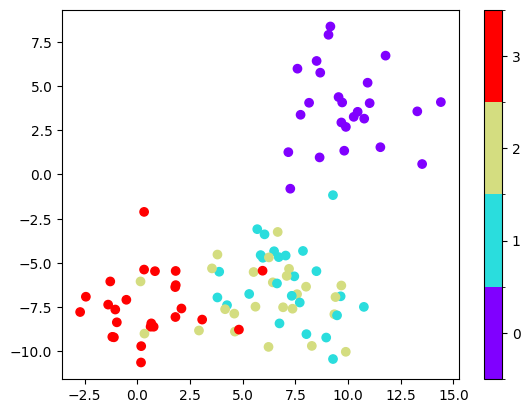

In [34]:
plt.scatter(X1[:,2], X1[:,4], c=Y1, cmap=cmap, norm=norm)
plt.colorbar(ticks=[0,1,2,3,4])

# PCA decomposition

Principal Component Analysis (see https://en.wikipedia.org/wiki/Principal_component_analysis) can be useful to project a high-dimensional space onto a lower dimensional space.

In [35]:
from sklearn import decomposition

In [36]:
# Get the documentation
# ?decomposition.PCA

In [37]:
pca = decomposition.PCA(n_components=4)

pc = pca.fit_transform(X1)

pc.shape

(100, 4)

In [38]:
# Organize the data with pandas

pc_df = pd.DataFrame(data = pc,
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = Y1
pc_df

,PC1,PC2,PC3,PC4,Cluster
0,8.133443,0.302138,9.984672,-0.423878,2
1,-18.931381,-0.193838,0.045462,3.894042,1
2,6.571463,14.188490,-3.120115,-1.278588,0
3,7.533948,-14.439427,-5.443487,-3.358252,3
4,4.591760,11.315284,-9.130630,1.420151,0
...,...,...,...,...,...
95,4.734792,15.677706,-4.013717,-1.638843,0
96,-14.474724,1.170496,1.650520,6.619600,1
97,6.305432,-13.098273,-3.843662,-3.060215,3
98,-22.169496,3.863984,1.128840,0.480688,1


In [39]:
pca.explained_variance_ratio_

array([0.41594854, 0.3391866 , 0.1600729 , 0.02016822])

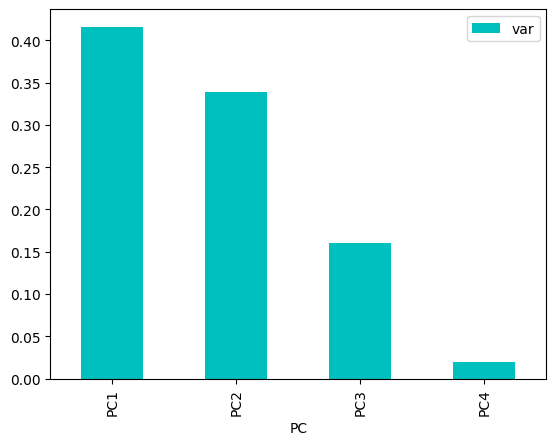

In [40]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
df.plot.bar(x='PC',y="var", color="c");

Text(0.5, 0, 'PC3')

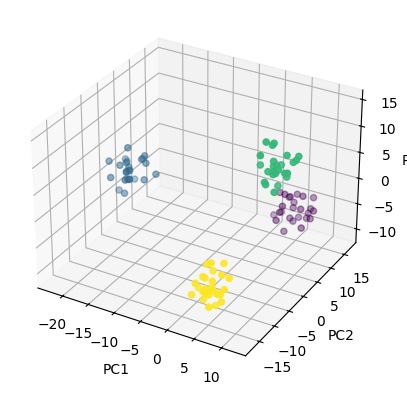

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['Cluster'])
#ax.legend()
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Homework

### **Homework**

Perform K-means clustering on both the original and the PCA-reduced blob dataset. Do you get the same results?

Note: the specific cluster index assigned by K-means to a given cluster (e.g. `0` or `1` or `2`) may differ (even between repeated calls of k-means on the same dataset), but the value of these specific indices do not carry any meaning: the important point is whether K-means finds the same separate clusters. (Irrespective of how they are labeled.)
    
</div>

### SOLUTION

In [42]:
# Recall the true labels
Y1

array([2, 1, 0, 3, 0, 2, 1, 2, 3, 3, 1, 3, 0, 2, 0, 0, 3, 2, 3, 2, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 1, 2,
       2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 3, 2, 3, 1, 2, 3, 2, 1, 3, 3, 0, 1,
       3, 3, 1, 2, 3, 2, 3, 0, 3, 3, 1, 1, 3, 1, 3, 1, 1, 0, 2, 1, 0, 2,
       0, 2, 1, 2, 0, 3, 2, 0, 1, 3, 1, 2])

### Original dataset

In [43]:
# K-means on the original data
kmeans = KMeans(n_clusters=4).fit(X1)
Y2 = kmeans.labels_
Y2

array([3, 2, 0, 1, 0, 3, 2, 3, 1, 1, 2, 1, 0, 3, 0, 0, 1, 3, 1, 3, 2, 0,
       0, 2, 0, 0, 3, 0, 0, 3, 0, 2, 3, 1, 1, 0, 3, 2, 1, 3, 2, 1, 2, 3,
       3, 0, 0, 2, 2, 0, 3, 0, 2, 0, 1, 3, 1, 2, 3, 1, 3, 2, 1, 1, 0, 2,
       1, 1, 2, 3, 1, 3, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 3, 2, 0, 3,
       0, 3, 2, 3, 0, 1, 3, 0, 2, 1, 2, 3], dtype=int32)

Text(0, 0.5, 'Y1 label')

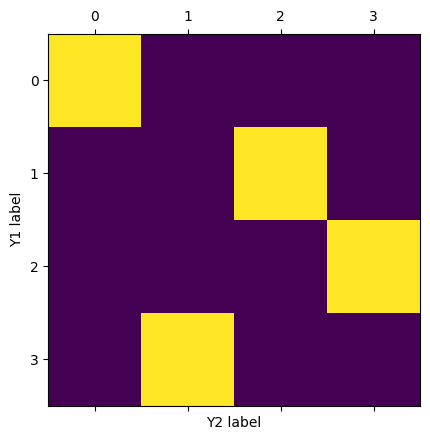

In [44]:
# How would you compare these? Here is a naive way of getting the cipher
counts = np.zeros((4,4))
for i1, i2 in zip(Y1, Y2):
    counts[i1, i2] += 1
decode2 = {i:counts[i,:].argmax() for i in range(4)}
plt.matshow(counts)
plt.xlabel('Y2 label')
plt.ylabel('Y1 label')

In [45]:
# Are they all the same? Yes
np.all(np.array([decode2[i] for i in Y1]) == Y2)

True

In [46]:
# This is a better method to compare the labels. 1.0 => perfect labeling
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(Y1, Y2)

1.0

### PCA-reduced dataset

In [47]:
# Do the same on the PCA reduced data. Again, this is perfect labeling
Y3 = KMeans(n_clusters=4, random_state=0).fit(pc).labels_
adjusted_rand_score(Y1, Y3)

1.0

### **Homework**
    
In K-means, we need to know the number of clusters in advance. Try using the DBSCAN algorithm instead, once again on both the original and the PCA-reduced dataset, and see if you get the same results.

(Note: DBSCAN requires the eps parameter to be set, i.e. the maximum distance between two samples for them to be considered as in the same neighborhood)
    

## Solution

In [48]:
from sklearn.cluster import DBSCAN

### Original dataset

Text(0, 0.5, 'n clusters found')

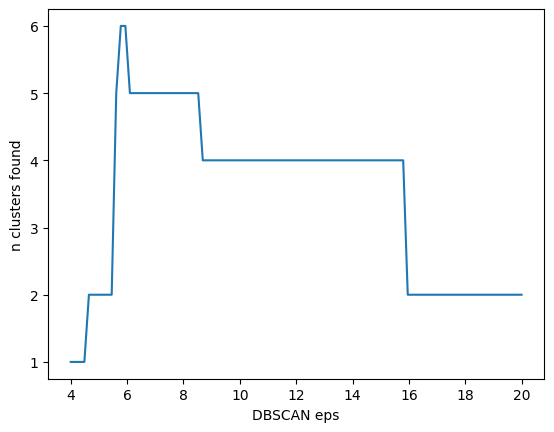

In [49]:
# Try various eps

@np.vectorize
def n_clusters_for_eps(eps):
    clustering = DBSCAN(eps=eps).fit(X1)
    return len(set(clustering.labels_))

x = np.linspace(4, 20, 100)
y = n_clusters_for_eps(x)
plt.plot(x, y)
plt.xlabel('DBSCAN eps')
plt.ylabel('n clusters found')

In [50]:
# pick eps = 10
clustering = DBSCAN(eps=10).fit(X1)
Y2 = clustering.labels_
set(Y2)

{0, 1, 2, 3}

In [51]:
# Compare with the true labels. Perfect agreement.
adjusted_rand_score(Y1, Y2)

1.0

Text(0, 0.5, 'Adjusted Rand score')

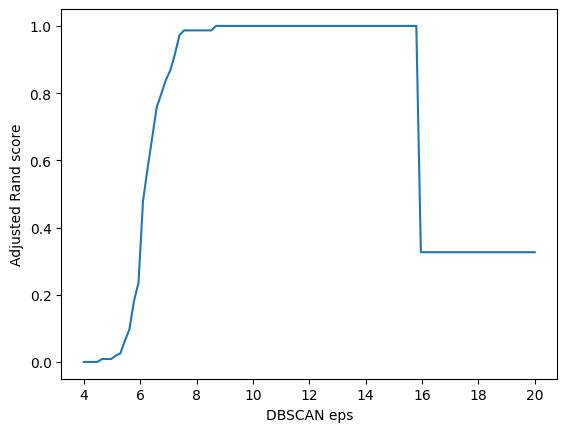

In [52]:
# Find the eps that can reproduce the labels
@np.vectorize
def adjusted_rand_score_for_eps(eps):
    clustering = DBSCAN(eps=eps).fit(X1)
    Y2 = clustering.labels_
    return adjusted_rand_score(Y1, Y2)

y = adjusted_rand_score_for_eps(x)
plt.plot(x, y)
plt.xlabel('DBSCAN eps')
plt.ylabel('Adjusted Rand score')

### PCA-reduced dataset

In [53]:
pca_clustering = DBSCAN(eps=10).fit(pc)
Y3 = pca_clustering.labels_
set(Y3)

{0, 1, 2, 3}

In [54]:
# Compare with the true labels. Perfect agreement.
adjusted_rand_score(Y1, Y3)

1.0